In [118]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
import pandas as pd
import numpy as np
from cnp.experiment import WorkingDirectory, generate_root
import os
import matplotlib.pyplot as plt
import matplotlib



In [120]:
data = 'eq'
data = 'matern'
data = 'weakly-periodic'
data = 'noisy-mixture'

os.chdir('/home/james/code/kernelcnp/experiments/synthetic/results/' + data + '-100/models/convGNP/innerprod-homo/seed-0/dim-1')

In [121]:
basis = ["2", "16", "64", "128", "512"]
colours = ["tab:blue", "tab:orange", "tab:purple", "tab:red", "tab:green"]
markers = ["o", "x", "s", "v", "D"]
sums = ["1"]


In [122]:
experiments = []
row_labels = []
column_labels = []
for m, colour in zip(basis, colours):
    for c, marker in zip(sums, markers):          
        experiment_name = os.path.join(f'basis-{m}', 
                                        f'sum-elements-{c}')

        wd = WorkingDirectory(root=experiment_name, print_root=False)
        experiments.append((m, c, colour, marker, wd))
                
# row_labels.append("Oracle-GP")
                
# for m in basis:
#     for c in sums:
#         row_labels.append(f'basis-{m}-sum-{c}')
        

d = data
column_labels.append(f'{d}')
column_labels.append(f'{d}-error')
column_labels.append(f'{d}-iterations')
column_labels.append(f'{d}-num-params')

column_labels.append("marker")
column_labels.append("colour")


# Create an empty dataframe
df = pd.DataFrame(index=row_labels, columns=column_labels)

In [123]:
data

'noisy-mixture'

In [124]:
for m, c, colour, marker, wd in experiments:
        try:
            mean = -np.loadtxt(wd.file('test_log_likelihood.txt', 
                        exists=True))
            print(mean)
            error = np.loadtxt(wd.file('test_log_likelihood_standard_error.txt',
                        exists=True))/np.sqrt(2048)
            iterations = np.loadtxt(wd.file('last_epoch.txt', 
                        exists=True))
            num_params = np.loadtxt(wd.file('num_params.txt',
                        exists=True))
            df.at[f'basis-{m}-sum-{c}', data] = mean
            df.at[f'basis-{m}-sum-{c}', data + '-error'] = error
            df.at[f'basis-{m}-sum-{c}', data + '-iterations'] = int(iterations)
            df.at[f'basis-{m}-sum-{c}', data + '-num-params'] = error
            df.at[f'basis-{m}-sum-{c}', 'marker'] = marker
            df.at[f'basis-{m}-sum-{c}', 'colour'] = colour
            
        except:
            print(wd.root)


-0.1302485674113268
0.579241925549286
0.5554404081773828
0.5747765925235581
0.5513915071968222


In [125]:
df

,noisy-mixture,noisy-mixture-error,noisy-mixture-iterations,noisy-mixture-num-params,marker,colour
basis-2-sum-1,-0.130249,0.000575,101,0.000575,o,tab:blue
basis-16-sum-1,0.579242,0.00048,101,0.00048,o,tab:orange
basis-64-sum-1,0.55544,0.00049,101,0.00049,o,tab:purple
basis-128-sum-1,0.574777,0.000488,101,0.000488,o,tab:red
basis-512-sum-1,0.551392,0.000499,101,0.000499,o,tab:green


In [126]:
os.chdir('/home/james/code/kernelcnp/experiments/synthetic/results/' + data + '-100/models/Oracle/seed-0/dim-1')
oracle_mean = np.loadtxt('test_nll_mean.txt') 
oracle_error = np.loadtxt('test_nll_error.txt')
oracle_diag_mean = np.loadtxt('test_diag_nll_mean.txt') 
oracle_diag_error = np.loadtxt('test_diag_nll_std.txt')
df.at['oracle', data] = oracle_mean
df.at['oracle', data + '-error'] = oracle_error
df.at['oracle-diag', data] = oracle_diag_mean
df.at['oracle-diag', data + '-error'] = oracle_diag_error

In [127]:
df

,noisy-mixture,noisy-mixture-error,noisy-mixture-iterations,noisy-mixture-num-params,marker,colour
basis-2-sum-1,-0.130249,0.000575,101,0.000575,o,tab:blue
basis-16-sum-1,0.579242,0.00048,101,0.00048,o,tab:orange
basis-64-sum-1,0.55544,0.00049,101,0.00049,o,tab:purple
basis-128-sum-1,0.574777,0.000488,101,0.000488,o,tab:red
basis-512-sum-1,0.551392,0.000499,101,0.000499,o,tab:green
oracle,1.1572644535759626,0.007487965846111614,NaN,NaN,NaN,NaN
oracle-diag,0.590859773558746,0.02299347329629037,NaN,NaN,NaN,NaN


In [128]:
def plot_results(d, df, zoom=False):
    plt.xticks([])
    x = np.arange(len(df[d]) - 2)
    ones = np.ones_like(x)
    y = df[d]
    e = df[d + '-error']
    label = df.index
    colour = df['colour'].tolist()
    marker = df['marker'].tolist()
    

    oracle_mean = df.at['oracle', d]  
    oracle_error = df.at['oracle', d + '-error' ]
    oracle_diag_mean = df.at['oracle-diag', d] 
    oracle_diag_error = df.at['oracle-diag', d + '-error'] 
        
    for i in range(0, len(x)):
        if y[i] is not np.NaN:
           plt.errorbar(x[i], y[i], e[i], marker=marker[i], color=colour[i], label=label[i])

    plt.plot(x, oracle_diag_mean * ones, label='Oracle-GP-Diagonal', color='k')
    plt.fill_between(x,
                     (oracle_diag_mean + oracle_diag_error) * ones,
                     (oracle_diag_mean - oracle_diag_error) * ones,
                     color='k', alpha=0.1)
    plt.plot(x, oracle_mean * ones, label='Oracle-GP', color='k')
    plt.fill_between(x,
                     (oracle_mean + oracle_error) * ones,
                     (oracle_mean - oracle_error) * ones,
                     color='k', alpha=0.1)

    plt.legend( ncol=2 ,bbox_to_anchor=(1, 0))
    
    y_min = np.min(y)
    y_max = np.max(y)
    epsilon = 0.05 * (y_max - y_min)

    if zoom:
        plt.ylim(y_min - epsilon, y_max + epsilon)
    plt.title(d)
    plt.show()

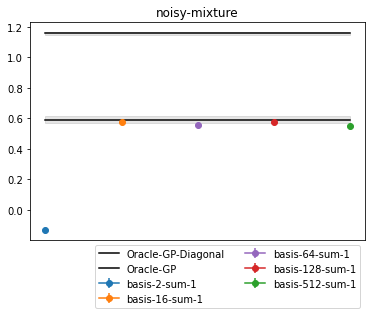

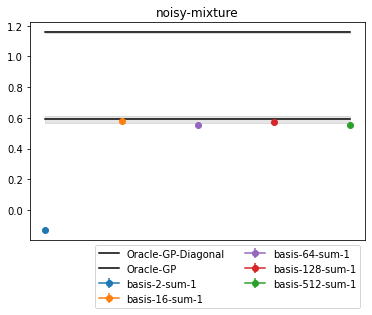

In [129]:


plot_results(data, df)

plot_results(data, df, True)


In [130]:
df.to_pickle('/home/james/code/kernelcnp/experiments/synthetic/notebooks/' + data + '-innerprod.pkl')